In [58]:
import pandas as pd
import seaborn as sns; sns.set()

In [38]:
df = pd.read_csv('../data_files/big_control.norm.megab.meta.csv', index_col=0)

In [39]:
df.head()

,Assay_Type,AssemblyName,AvgSpotLen,BioProject,BioSample,Center_Name,DATASTORE_filetype,Experiment,InsertSize,Instrument,...,alpha_read_covers_snps_count_exact,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,norm_alignment_count,norm_alpha_wt_count,norm_alpha_dup_count,norm_beta_count,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
SRR074903,RNA-Seq,NaN,102,NaN,SAMN00138961,MAX PLANCK INSTITUTE,sra,SRX032360,0,Illumina Genome Analyzer II,...,0,0,0,0.005236,0.001611,0.001611,0.002014,0.0,0.0,0.0
SRR1514978,RNA-Seq,NaN,202,PRJNA136121,SAMN02911816,GEO,sra,SRX652617,0,Illumina HiSeq 2500,...,0,0,0,0.008728,0.002909,0.002909,0.002909,0.0,0.0,0.0
SRR1514979,RNA-Seq,NaN,202,PRJNA136121,SAMN02911817,GEO,sra,SRX652618,0,Illumina HiSeq 2500,...,0,0,0,0.007538,0.002513,0.002513,0.002513,0.0,0.0,0.0
SRR1514980,RNA-Seq,NaN,202,PRJNA136121,SAMN02911818,GEO,sra,SRX652619,0,Illumina HiSeq 2500,...,0,0,0,0.001922,0.000405,0.000405,0.001113,0.0,0.0,0.0
SRR1514981,RNA-Seq,NaN,202,PRJNA136121,SAMN02911819,GEO,sra,SRX652620,0,Illumina HiSeq 2500,...,0,0,0,0.002291,0.000382,0.000382,0.001527,0.0,0.0,0.0


In [40]:
filtered_df = df[(df['AvgSpotLen'] > 149) &
                (df['Assay_Type']== 'RNA-Seq') &
                (df['Organism'] =='Homo sapiens') &
                (df['LibrarySelection'] == 'cDNA') &
                (df['MBases']> 1000)
                ]         

In [41]:
filtered_df.columns

Index(['Assay_Type', 'AssemblyName', 'AvgSpotLen', 'BioProject', 'BioSample',
       'Center_Name', 'DATASTORE_filetype', 'Experiment', 'InsertSize',
       'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource',
       'Library_Name', 'LoadDate', 'MBases', 'MBytes', 'Platform',
       'ReleaseDate', 'SRA_Sample', 'SRA_Study', 'Sample_Name', 'cell_type',
       'source_name', 'tissue', 'Consent', 'DATASTORE_provider', 'Organism',
       'file_location', 'source', 'alignment_count', 'alpha_wt_count',
       'alpha_dup_count', 'beta_count', 'alpha_wt_zero_edit_count',
       'alpha_dup_zero_edit_count', 'beta_zero_edit_count',
       'alpha_read_covers_snps_count', 'alpha_dup_read_covers_snps_count',
       'beta_read_covers_snps_count', 'alpha_read_covers_snps_count_exact',
       'alpha_dup_read_covers_snps_count_exact',
       'beta_read_covers_snps_count_exact', 'norm_alignment_count',
       'norm_alpha_wt_count', 'norm_alpha_dup_count', 'norm_beta_count',
       'norm_a

In [53]:
has_dup = filtered_df[filtered_df['norm_alpha_dup_read_covers_snps_count_exact'] !=0]

has_dup [['BioProject', 'cell_type', 'source_name', 'tissue']]['source_name'].value_counts()

erythroid progenitor cells_U2AF1 S34F                                                                           5
T cells                                                                                                         4
subcutaneous adipose tissue                                                                                     4
lung tissue                                                                                                     4
erythroid progenitor cells_U2AF1 wild-type                                                                      4
Endometrium                                                                                                     3
adipose                                                                                                         3
CD34+ cells, healthy control                                                                                    2
Monocytes                                                                               

In [52]:
has_dup [['BioProject', 'cell_type', 'source_name', 'tissue']]

,BioProject,cell_type,source_name,tissue
SRR1660322,PRJNA268220,bone marrow CD34+ cells,"CD34+ cells, healthy control",NaN
SRR1660324,PRJNA268220,bone marrow CD34+ cells,"CD34+ cells, healthy control",NaN
SRR1785264,PRJNA274360,NaN,subcutaneous adipose tissue,NaN
SRR1785265,PRJNA274360,NaN,subcutaneous adipose tissue,NaN
SRR1785308,PRJNA274360,NaN,subcutaneous adipose tissue,NaN
SRR1785309,PRJNA274360,NaN,subcutaneous adipose tissue,NaN
SRR1947738,PRJNA279975,NaN,K4E-MEF2B-V5,NaN
ERR453480,PRJEB5765,NaN,NaN,NaN
ERR453481,PRJEB5765,NaN,NaN,NaN
SRR2926026,PRJNA301173,NaN,Normal Skin,NaN


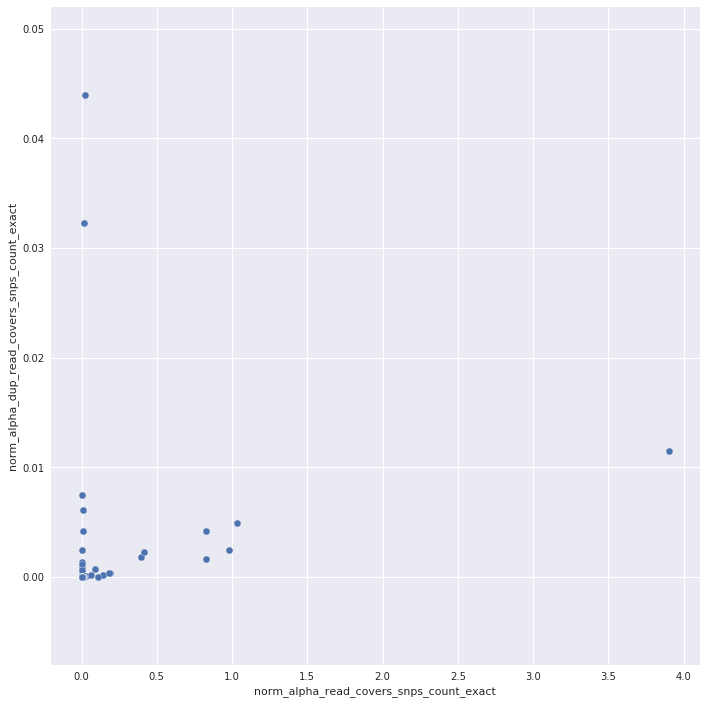

In [68]:
plot = sns.pairplot(x_vars=["norm_alpha_read_covers_snps_count_exact"], y_vars=["norm_alpha_dup_read_covers_snps_count_exact"], data=filtered_df, size=10)

axes = plot.axes


In [77]:
filtered_df['source_name'].value_counts().to_csv('cell_types')